<a href="https://colab.research.google.com/github/kkwh/java_lec_python/blob/main/ml02_km.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
* import module_name [as alias]
* from module_name import class_name, function_name, ...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn 패키지: 머신 러닝 알고리즘을 구현한 패키지.
from sklearn.neighbors import KNeighborsClassifier  # 클래스
from sklearn.model_selection import train_test_split  # 함수


# 데이터셋 준비

수산시장(fish market) 데이터 셋, 물고기 종류와 물고기의 여러가지 특성들
(길이, 무게, 대각선 길이, ...)

In [ ]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [ ]:
# CSV 파일을 읽어서 DataFrame을 생성
fish_df = pd.read_csv(fish_csv)

In [ ]:

fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


# 데이터 탐색(EDA: Exploratory Data Analysis)
# 카테고리 타입 변수 탐색

In [ ]:
fish_df.Species.unique()  # 중복되지 않는 값

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
species_count = fish_df.Species.value_counts()
species_count


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

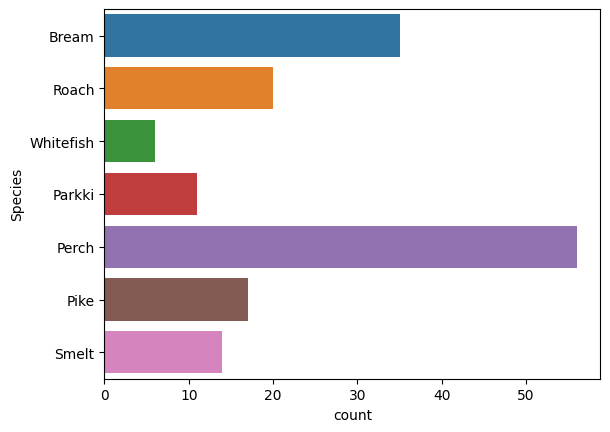

In [ ]:
sns.countplot(data=fish_df, y='Species')
plt.show()

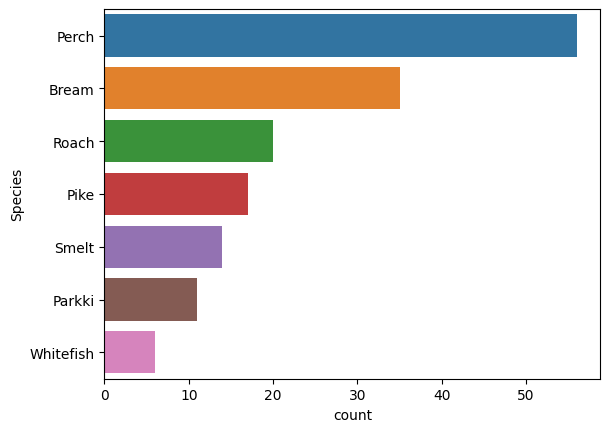

In [ ]:
sns.countplot(data=fish_df, y='Species',
              order=species_count.index)
plt.show()

# 숫자 타입 변수 탐색

In [ ]:

fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
variables = fish_df.columns[1:]  # 숫자 타입 컬럼(변수)들의 이름
variables

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,))

for i, v in enumerate(variables):
    sns.histplot(data=fish_df, x=v, ax=ax[i])

plt.show()


TypeError: ignored

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 4))

for i, v in enumerate(variables):
    sns.boxplot(data=fish_df, x=v, ax=ax[i])

plt.show()

In [ ]:
fish_df.corr(numeric_only=True)  # Pearson 상관 계수

In [ ]:

sns.pairplot(data=fish_df)
plt.show()

In [ ]:
sns.pairplot(data=fish_df, hue='Species')
plt.show()

# 문제 정의
* 이진 분류(binary classification): Bream(도미), Smelt(빙어) 분류 문제.
* 독립 변수 선택: Weight(무게), Length(길이)

In [ ]:

# 머신 러닝에서 사용할 데이터프레임:
df = fish_df[(fish_df.Species == 'Bream') | (fish_df.Species == 'Smelt')][['Species', 'Weight', 'Length']]

In [ ]:

df.info()

In [ ]:

df.head()


In [ ]:
df.Species.unique()

In [ ]:
df.Species.value_counts()


In [ ]:
sns.scatterplot(data=df, x='Length', y='Weight', hue='Species')
plt.grid()
plt.show()


* scikit-learn 패키지는 머신 러닝 알고리즘을 훈련시킬 때, 데이터(특성)와 레이블  (타겟)을 구분해서 사용.
* 특성 배열은 2차원 배열. 타겟 배열은 1차원 배열.
* 도미-빙어 2진 분류 문제
  * 특성 배열: 독립변수들을 원소로 갖는 배열. Weight, Length를 컬럼으로 갖는 2차원 배열
  * 타겟 배열: 레이블을 원소로 배열. Species만을 갖는 1차원 배열

In [ ]:

# 특성 배열의 shape: (n_samples, n_features), (샘플 개수, 특성 개수)
X = df[['Weight', 'Length']].values

# 타겟 배열의 shape: (n_samples,)
y = df['Species'].values

In [ ]:
print(X.shape)  # (49, 2)
print(y.shape)  # (49,)


In [ ]:
X[:5]  # 특성 배열에서 첫 5개 샘플

In [ ]:
y[:5]  # 타겟 배열에서 첫 5개 샘플

In [ ]:
X[-5:]  # 특성 배열에서 마지막 5개 샘플

In [ ]:
y[-5:]  # 타겟 배열에서 마지막 5개 샘플

# 머신 러닝 모델 선택
KNN(K-Nearest Neighbors, k-최근접 이웃) 분류(classification) 알고리즘

* k개의 가장 가까운 이웃들의 레이블을 사용해서 예측(분류)하는 머신 러닝 모델.
* KNN 모델(알고리즘)은 별도의 훈련(학습) 시간이 필요하지 않음.
* KNN은 예측을 할 때 훈련 데이터와 테스트 데이터 사이의 거리들을 계산한 후 가장 가까운 이웃(거리) k를 찾음.
  * 예측 시간이 오래 걸릴 수 있음.
  * 이런 이유로 KNN을 "게으른 알고리즘(lazy algorithm)"이라고 부름.

In [ ]:
knn = KNeighborsClassifier()
# n_neighbors 파라미터: 기본값 5. KNN 알고리즘에서 사용할 가장 가까운 이웃 개수.

In [ ]:
knn.fit(X, y)
#> 지도 학습(supervised learning): 머신 러닝 모델에게 특성과 레이블을 모두 제공하고 훈련(학습).

In [ ]:
# 훈련 셋의 예측값을 계산.
y_pred = knn.predict(X)

In [ ]:
print(y_pred)  # KNN 모델의 예측값 출력

In [ ]:
print(y) # 실젯값 출력

In [ ]:
y == y_pred  # 실젯값(타겟)과 예측값이 같은 지 다른 지 비교

In [ ]:
np.mean(y == y_pred)  # 정확도(accuracy)

In [ ]:
X_test = np.array([
    [600, 30],
    [50, 14]
])
print(X_test)

In [ ]:
# 훈련 셋 시각화
sns.scatterplot(data=df, x='Length', y='Weight', hue='Species')

# 가상 물고기 테스트 셋(X_test) 시각화
plt.scatter(x=X_test[:, 1], y=X_test[:, 0], c='red', marker='^')

plt.grid()
plt.show()

In [ ]:
y_test_pred = knn.predict(X_test)
print(y_test_pred)

In [ ]:
neigh_dist, neigh_ind = knn.kneighbors(X_test)


In [ ]:
print(neigh_dist)  # 테스트 샘플에서 가장 가까운 거리 k(=5)개들의 배열

In [ ]:
print(neigh_ind)  # 테스트 샘플에서 가장 가까운 이웃 k(=5)개의 인덱스

In [ ]:
y[neigh_ind[0]]  # (600g, 30cm) 가상 물고기에서 가장 가까운 이웃 5개의 레이블

In [ ]:
y[neigh_ind[1]]  # (50g, 14cm) 가상 물고기에서 가장 가까운 이웃 5개의 레이블

In [ ]:
# accuracies = 정확도를 저장할 배열
# k = [1, 50) 범위에서 반복:
    # KNN(n_neighbors=k) 객체 생성
    # KNN.훈련(X, y)
    # KNN.예측(X)
    # 정확도 계산 -> 배열에 저장
# 그래프 그리기

In [ ]:
accuracies = [] # k값의 변화에 따른 KNN 모델의 정확도를 저장하기 위한 리스트
k_values = np.arange(1, 50) # [1, 2, 3, ..., 48, 49]
for k in k_values:
    knn_clf = KNeighborsClassifier

훈련 셋과 테스트 셋을 나누는 방법:

* 순차 추출(sequential sampling)
* 임의 추출(random sampling)
* 층화 추출(stratified sampling)